<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/hw4/hw4_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.svm import SVC

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
#read data from csv file
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/cancer.csv'
df = pd.read_csv(file_path)

from IPython.display import display
#display(df)

In [143]:
# Checking Null values
#df.isnull().sum()*100/df.shape[0]

There is a column with null-values, 'Unnamed:32' --> I just excluded this one from the training

In [144]:
#print column names
tmp = df.columns.values
#tmp

In [145]:
#select required parameters - leave out id and unnamed:32
varlist = tmp[1:-1:1]
varlist
df = df[varlist]
#df.head()

In [146]:
# Defining the map function
def binary_map(x):
    return x.map({'M': 1, 'B': 0})

# Applying the function to the housing list
df[['diagnosis']] = df[['diagnosis']].apply(binary_map)
#df.head()

In [147]:
#preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#dont normalize outcome - already binary
num_vars = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# Use scaler
df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [148]:
#randomize and split
from sklearn.model_selection import train_test_split

np.random.seed(12)
df_train, df_val = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
df_train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
58,0,0.287236,0.324653,0.268261,0.162757,0.252505,0.056776,0.001621,0.020711,0.383333,...,0.224120,0.272655,0.198366,0.107870,0.204253,0.033588,0.001474,0.038179,0.172285,0.051489
554,0,0.279190,0.649645,0.267501,0.157285,0.258193,0.119195,0.145150,0.116451,0.255556,...,0.212024,0.632196,0.191394,0.100890,0.340289,0.130696,0.194808,0.223127,0.159077,0.113997
351,1,0.415022,0.321610,0.437496,0.260912,0.647016,0.665665,0.682755,0.617296,0.664141,...,0.335468,0.323827,0.343593,0.179439,0.553589,0.463089,0.548882,0.733677,0.528287,0.327693
136,0,0.223816,0.235374,0.213738,0.118812,0.473684,0.127508,0.084161,0.129225,0.140909,...,0.192102,0.358742,0.178047,0.088847,0.369346,0.073260,0.083546,0.239450,0.028977,0.120622
497,0,0.259785,0.257017,0.253334,0.142778,0.330866,0.174591,0.084560,0.117744,0.235354,...,0.218072,0.328358,0.211216,0.103741,0.372647,0.216656,0.161981,0.361856,0.289769,0.141480


In [149]:
y_train = df_train.pop('diagnosis') # seperate x from y
y_val = df_val.pop('diagnosis')

In [150]:
y_train = y_train.to_numpy() # convert to numpy array for matrix multiplication

y_val = y_val.to_numpy()
y_val = y_val.reshape(-1, 1) # reshape


x_train = df_train.to_numpy()
x_val = df_val.to_numpy()


X_0 = np.ones((len(y_train), 1)) # put together input vector
x_train = np.hstack((X_0, x_train))

tmp = np.ones((len(x_val), 1))
x_val = np.hstack((tmp, x_val))

In [151]:
#identify best k-value
n = 15

acc  = np.zeros(n)
prec = np.zeros(n)
rec  = np.zeros(n)
f1   = np.zeros(n)

for k in range(1,n):
  #principal component analysis
  pca = PCA(n_components=k)
  pc_train = pca.fit_transform(x_train)
  pc_val = pca.fit_transform(x_val)

  #support vector classifier
  clf = SVC(kernel='linear', C=1E3)
  clf.fit(pc_train, y_train)
  y_pred = clf.predict(pc_val)

  #get metrics
  acc[k]  = metrics.accuracy_score(y_val, y_pred)
  prec[k] = metrics.precision_score(y_val, y_pred)
  rec[k]  = metrics.recall_score(y_val, y_pred)
  f1[k]   = metrics.f1_score(y_val, y_pred)

In [152]:
acc

array([0.        , 0.92105263, 0.93859649, 0.92105263, 0.93859649,
       0.92982456, 0.92982456, 0.92105263, 0.9122807 , 0.92982456,
       0.93859649, 0.92982456, 0.92105263, 0.92982456, 0.92982456])

In [153]:
acc.argmax()

2

Training with two principal components gives best results.

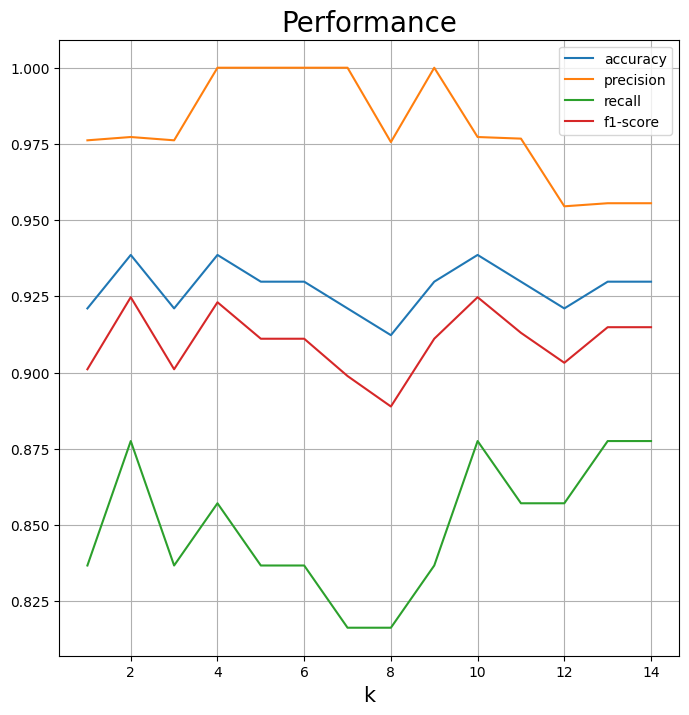

In [154]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('k', fontsize = 15)
ax.set_title('Performance', fontsize = 20)

k = np.linspace(1,n-1,n-1)

plt.plot(k, acc[1:])
plt.plot(k, prec[1:])
plt.plot(k, rec[1:])
plt.plot(k, f1[1:])

ax.legend(['accuracy', 'precision', 'recall', 'f1-score'])
ax.grid()

Now - continue with k=2, trying different kernels

In [155]:
#identify best kernel and best c-paramter

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

n = 4
acc  = np.zeros([n,n])
prec = np.zeros([n,n])
rec  = np.zeros([n,n])
f1   = np.zeros([n,n])

i = 0
for k in kernels:
  j = 0

  for c in [1, 10, 100, 1000]:
    #principal component analysis

    pca = PCA(n_components=2) #k=2, previously identified as best
    pc_train = pca.fit_transform(x_train)
    pc_val = pca.fit_transform(x_val)

    #support vector classifier
    clf = SVC(kernel=k, C=c)
    clf.fit(pc_train, y_train)
    y_pred = clf.predict(pc_val)


    #get metrics
    acc [i][j]  = metrics.accuracy_score(y_val, y_pred)
    prec[i][j]  = metrics.precision_score(y_val, y_pred)
    rec [i][j]  = metrics.recall_score(y_val, y_pred)
    f1  [i][j]  = metrics.f1_score(y_val, y_pred)
    j = j+1
  i = i+1


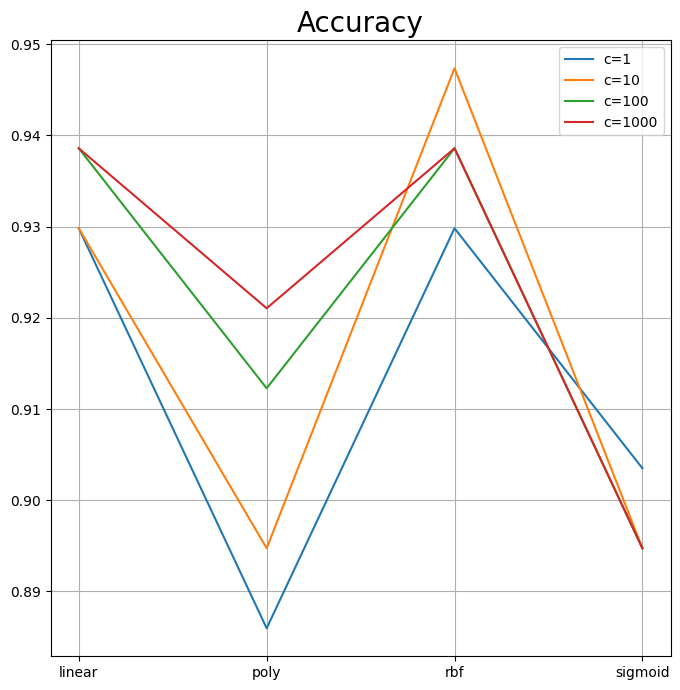

In [156]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
#ax.set_xlabel('k', fontsize = 15)
ax.set_title('Accuracy', fontsize = 20)

plt.plot(kernels,acc)
ax.legend(['c=1', 'c=10', 'c=100', 'c=1000'])

ax.grid()

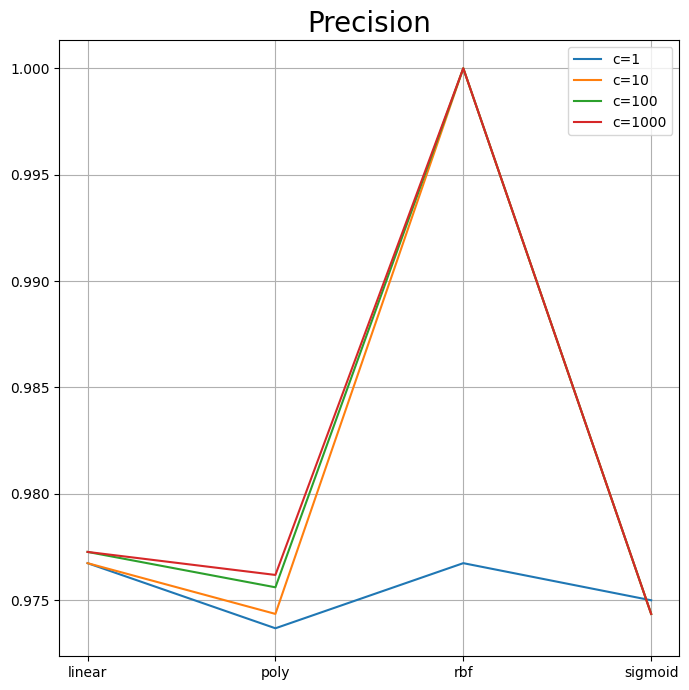

In [157]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
#ax.set_xlabel('k', fontsize = 15)
ax.set_title('Precision', fontsize = 20)

plt.plot(kernels,prec)
ax.legend(['c=1', 'c=10', 'c=100', 'c=1000'])

ax.grid()

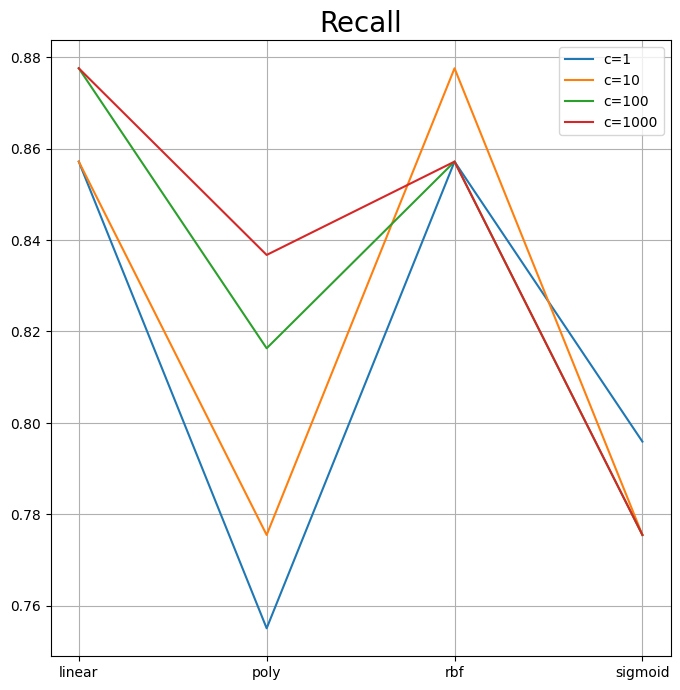

In [158]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
#ax.set_xlabel('k', fontsize = 15)
ax.set_title('Recall', fontsize = 20)

plt.plot(kernels,rec)
ax.legend(['c=1', 'c=10', 'c=100', 'c=1000'])

ax.grid()

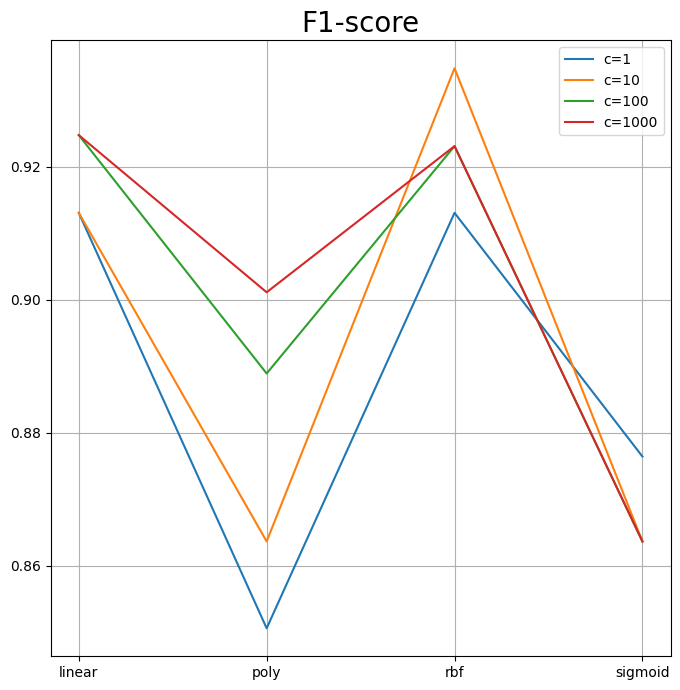

In [159]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
#ax.set_xlabel('k', fontsize = 15)
ax.set_title('F1-score', fontsize = 20)

plt.plot(kernels,f1)
ax.legend(['c=1', 'c=10', 'c=100', 'c=1000'])

ax.grid()